# Regresión Lineal

La regresión lineal es un metodo estadistico utilizado para determinar la asociacion lineal entre dos o mas variables, las cuales en su caso mas simple se denominan como variable explicativa y variable explicada o variable respuesta, generalmente la variable explicativa se representa con la letra **X** y la variable respuesta con la letra **Y**. Visto de otra manera la regresion lineal es un metodo algoritmico de apredizaje supervisado el cual consiste en representar la relacion anteiormente descrita,como su nombre lo indica, mediante una linea recta que atraviesa los datos y nos indique una tendenia en ellos.

Se cuenta que el primero en realizar el desubrimiento de la regresion fue Karl Gauss sin embargo, esté no lo haria publico pues consideraria que era un procedimiento trivial y por ende alguien mas ya lo habia hecho. Por otra parte otro lado un matematico de su epoca si haria este descubrimiento publico lo cual despertaria el interes de Gauss por reclamar el reconocimiento a dicho descubrimiento, consiguiendo asi la mayor parte de este. 

Como se menciono anteriormente la regresion lineal simple consiste en ajustar una linea recta en los datos en los cuales etamos interesado, es por eso que se expresara dicha regresion mediante la ecuacion de una recta.

$$ Y=\beta_0 + \beta_1 X
$$

Donde **Y** y **X** correponden a las variables respuesta y explicativa respectivamente, **$\beta_0$** y **$\beta_1$** son los parametros de intersecto y pendiente respectivamente los cuales que se deben estimar.

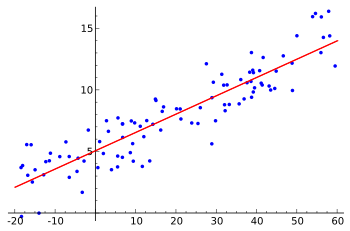




Para estimar dichos parametros se utiliza el metodo de [minimos cuadrados](https://es.wikipedia.org/wiki/Mínimos_cuadrados), el cual permite encontrar los parametros que minimicen el error cuadratico, siendo 
$$ e = y - \hat{y} $$
siendo **y** los datos en la muestra original, $\hat{y}$ los datos estimados con la recta, es decir hallar los parametros que minimicen la distancia al cuadrado de cada punto en la muestra a la recta de regresion.

Luego la estimacion de los parametros que se obtiene es:

$$
\hat{\beta_1}=\frac{\sum_{i=1}^n x_iy_i-n\bar{x}\bar{y}}{\sum_{i=1}^n x_i^2 -\frac{1}{n}(\sum_{i=1}^n x_i )^2 } \\
\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}
$$

# Ejemplo en python
A continuación se realizara un ejemplo donde se ilustrara el metodo de regresion lineal simple, aplicado a una base de datos correspondiente a el salario y los años de experiencia de 31 personas obtenida del portal de datos [Kaggle](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression/code), esto se llevara acabo utilizando el lenguaje de programación python.

Primero se cargaran las librerias necearias para realizar el ejercicio. 

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importacion de datos
Se importa la base de datos y se realiza un grafico para observar una posible relacion de las variables.

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [24]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Salary_Data.csv")
data.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


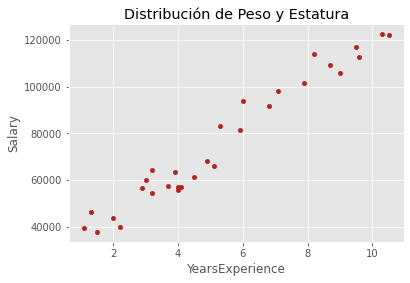

In [23]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots()

data.plot(
    x    = 'YearsExperience',
    y    = 'Salary',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Salario y Experiencia');

# Definicion del modelo

In [26]:
# División de los datos en train y test
# ==============================================================================
X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [24346.35037514]
Coeficiente: [('YearsExperience', 9646.582342916585)]
Coeficiente de determinación R^2: 0.9563208965458185


In [28]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[55215.41387247]
 [61968.02151252]
 [45568.83152956]]

El error (rmse) de test es: 5889.757771271846


Como podemos ver se obtubo un buen modelo con un 95% de varibilidad explicada, ademas en el siguiente grafico se puede observar como se ajusta la recta a lo datos.

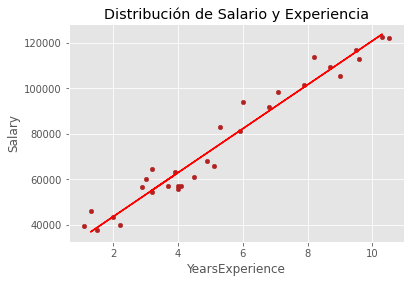

In [36]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots()

data.plot(
    x    = 'YearsExperience',
    y    = 'Salary',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Salario y Experiencia');
plt.plot(X_test, predicciones, color='red')


Este ejemplo fue realizado con el codigo expuesto en la pagina [Ciencia de datos](https://https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html) en el cual se modifico los datos con los que se trabajó.

# Conclusion

Como se pudo ver la regresion lineal es un metodo estadistico que permite establecer una relacion entre dos variables por lo cual permite analizar y predecir valores de la variable dependiente, es por esto que le permite tener muchas aplicaciones en diferentes areas de conocimiento. 